<a href="https://colab.research.google.com/github/geungjungsu/Techit_Project/blob/main/AARRR(A_%EC%9C%A0%EC%9E%85)_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 트래픽 소스별 방문자 수 계산

In [ ]:
# order와 ord_it 데이터를 order_id를 기준으로 병합
merged_data = pd.merge(order, ord_ite, on='order_id', how='inner')

# Origin을 기준으로 트래픽 소스별 방문자 수 계산
traffic_source_visitors = merged_data['origin'].value_counts()
print("트래픽 소스별 방문자 수:")
print(traffic_source_visitors)

# 트래픽 소스별 전환 수 계산 (구매 완료 건수), (실현수익률 기준)
delivered_orders = merged_data[(merged_data['order_status'] != 'canceled') & (merged_data['order_status'] != 'unavailable')]
conversion_by_source = delivered_orders['origin'].value_counts()
print("트래픽 소스별 전환 수:")
print(conversion_by_source)

# # 트래픽 소스별 전환 수 계산 (구매 완료 건수), (배송완료 기준)
# delivered_orders = merged_data[(merged_data['order_status'] == 'delivered')]
# conversion_by_source = delivered_orders['origin'].value_counts()
# print("트래픽 소스별 전환 수:")
# print(conversion_by_source)

# 전환율 계산
conversion_rate_by_source = (conversion_by_source / traffic_source_visitors) * 100
print("트래픽 소스별 전환율:")
print(conversion_rate_by_source)

트래픽 소스별 방문자 수:
origin
paid_search       2116
organic_search    1894
unknown           1723
social             636
direct_traffic     324
other              129
referral           115
email               27
display              7
Name: count, dtype: int64
트래픽 소스별 전환 수:
origin
paid_search       2113
organic_search    1893
unknown           1722
social             635
direct_traffic     323
other              129
referral           115
email               27
display              7
Name: count, dtype: int64
트래픽 소스별 전환율:
origin
paid_search        99.858223
organic_search     99.947202
unknown            99.941962
social             99.842767
direct_traffic     99.691358
other             100.000000
referral          100.000000
email             100.000000
display           100.000000
Name: count, dtype: float64


In [ ]:
traffic_sources = merged_data['origin'].unique()

for source in traffic_sources:
    source_data = merged_data[merged_data['origin'] == source]
    top_items = order['product_category_name_english'].value_counts().head(5)
    print(f"트래픽 소스: {source}")
    print(top_items)
    print()

트래픽 소스: paid_search
product_category_name_english
bed_bath_table           11837
health_beauty             9942
sports_leisure            8939
furniture_decor           8730
computers_accessories     8102
Name: count, dtype: int64

트래픽 소스: organic_search
product_category_name_english
bed_bath_table           11837
health_beauty             9942
sports_leisure            8939
furniture_decor           8730
computers_accessories     8102
Name: count, dtype: int64

트래픽 소스: social
product_category_name_english
bed_bath_table           11837
health_beauty             9942
sports_leisure            8939
furniture_decor           8730
computers_accessories     8102
Name: count, dtype: int64

트래픽 소스: unknown
product_category_name_english
bed_bath_table           11837
health_beauty             9942
sports_leisure            8939
furniture_decor           8730
computers_accessories     8102
Name: count, dtype: int64

트래픽 소스: referral
product_category_name_english
bed_bath_table           11837


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

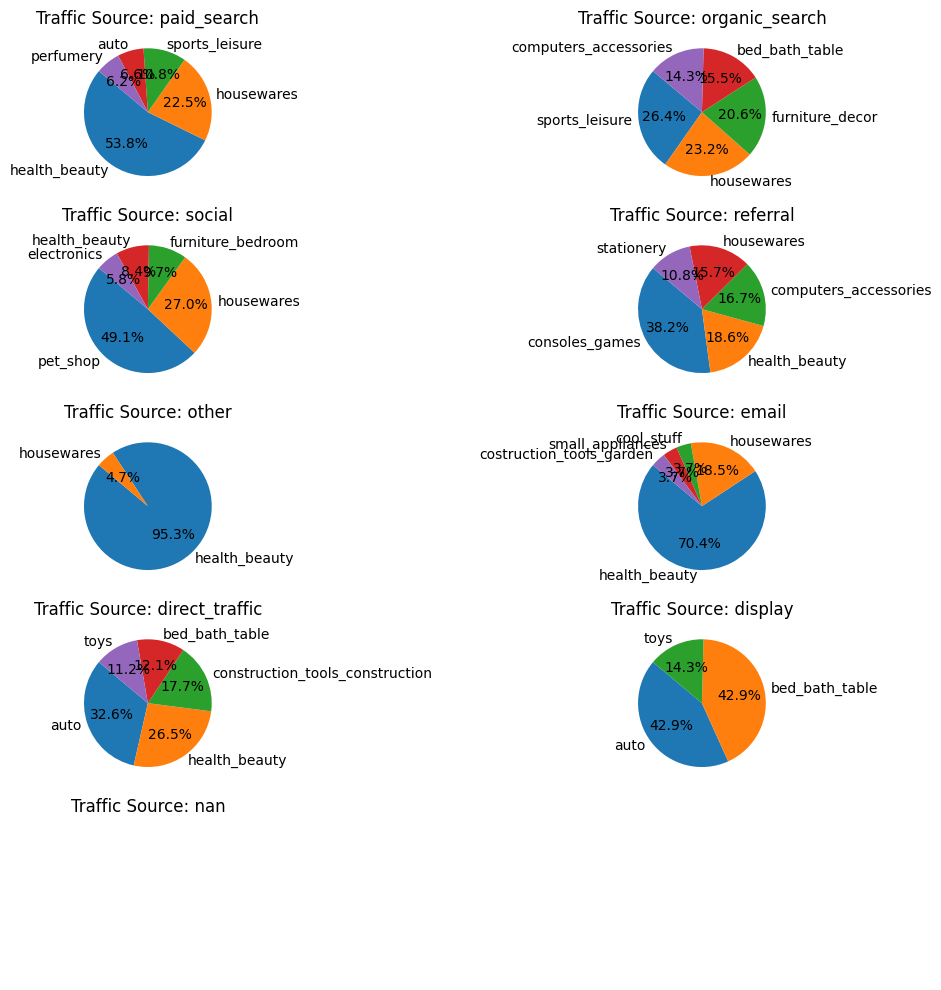

In [ ]:
# 'unknown'을 제외한 트래픽 소스별 선호 물품 탑5를 계산
traffic_sources = merged_data[merged_data['origin'] != 'unknown']['origin'].unique()

# 동적으로 subplot 그리기
num_sources = len(traffic_sources)
cols = 2
rows = (num_sources + 1) // cols

plt.figure(figsize=(12, 10))

for idx, source in enumerate(traffic_sources, start=1):
    plt.subplot(rows, cols, idx)
    source_data = merged_data[merged_data['origin'] == source]
    top_items = source_data['product_category_name_english'].value_counts().head(5)

    labels = top_items.index
    sizes = top_items.values

    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(f"Traffic Source: {source}")

plt.tight_layout()
plt.show()

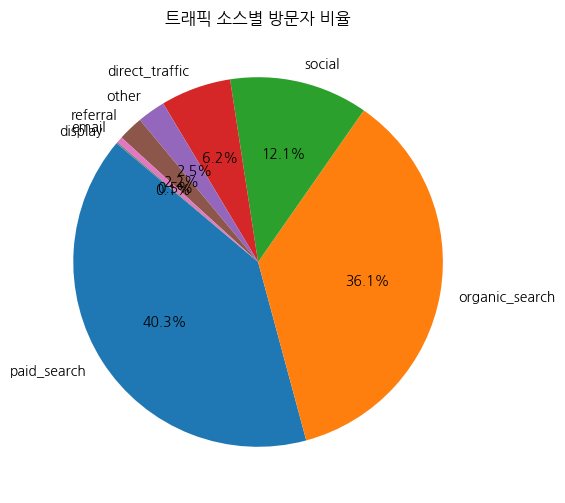

In [ ]:
import koreanize_matplotlib
# 'unknown' 항목 제거
conversion_by_source_filtered = conversion_by_source[conversion_by_source.index != 'unknown']

# 파이 차트 시각화
plt.figure(figsize=(10, 6))
conversion_by_source_filtered.plot.pie(autopct='%1.1f%%', startangle=140)
plt.title('트래픽 소스별 방문자 비율')
plt.ylabel('')  # y축 라벨 제거
plt.show()

In [ ]:
# # 데이터프레임으로 변환
# conversion_rate_df = conversion_by_realized_orders.reset_index()
# conversion_rate_df.columns = ['Traffic Source', 'Conversion Rate']

# # 막대 그래프 그리기
# plt.figure(figsize=(12, 6))
# bar_plot = sns.barplot(x='Traffic Source', y='Conversion Rate', data=conversion_rate_df)

# # 그래프 위에 수치 표시
# for p in bar_plot.patches:
#     bar_plot.annotate(format(p.get_height(), '.2f'),
#                       (p.get_x() + p.get_width() / 2., p.get_height()),
#                       ha = 'center', va = 'center',
#                       xytext = (0, 9),
#                       textcoords = 'offset points')

# plt.title('Conversion Rate by Traffic Source')
# plt.xlabel('Traffic Source')
# plt.ylabel('Conversion Rate (%)')
# plt.show()

In [ ]:
# 트래픽 소스별 주문 데이터 추출
traffic_source_orders = merged_data.groupby('origin')

# 각 트래픽 소스별로 상품 카테고리별 주문 건수 계산 후 상위 1개 카테고리 추출
top_category_by_traffic_source = {}

for source, group in traffic_source_orders:
    order_count_by_category = group.groupby('product_category_name_english')['order_id'].count()
    top_category = order_count_by_category.idxmax()  # 가장 많이 주문된 카테고리의 인덱스 반환
    top_category_by_traffic_source[source] = top_category

print("트래픽 소스별 가장 많이 주문된 상품 카테고리:")
for source, category in top_category_by_traffic_source.items():
    print(f"{source}: {category}")

트래픽 소스별 가장 많이 주문된 상품 카테고리:
direct_traffic: auto
display: auto
email: health_beauty
organic_search: sports_leisure
other: health_beauty
paid_search: health_beauty
referral: consoles_games
social: pet_shop
unknown: watches_gifts


In [ ]:
# organic_search와 paid_search 트래픽 소스로 필터링
organic_data = merged_data[merged_data['origin'] == 'organic_search']
paid_data = merged_data[merged_data['origin'] == 'paid_search']

# 각 트래픽 소스별로 상품 카테고리별 주문 건수 계산
organic_order_count_by_category = organic_data.groupby('product_category_name_english')['order_id'].count().nlargest(10)
paid_order_count_by_category = paid_data.groupby('product_category_name_english')['order_id'].count().nlargest(10)

print("Organic Search에서 가장 많이 주문된 상위 10개 상품 카테고리:")
print(organic_order_count_by_category)

print("\nPaid Search에서 가장 많이 주문된 상위 10개 상품 카테고리:")
print(paid_order_count_by_category)

Organic Search에서 가장 많이 주문된 상위 10개 상품 카테고리:
product_category_name_english
sports_leisure            225
housewares                198
furniture_decor           176
bed_bath_table            132
computers_accessories     122
health_beauty             122
baby                      117
pet_shop                  114
signaling_and_security     53
auto                       48
Name: order_id, dtype: int64

Paid Search에서 가장 많이 주문된 상위 10개 상품 카테고리:
product_category_name_english
health_beauty            757
housewares               317
sports_leisure           152
auto                      93
perfumery                 87
books_technical           80
stationery                74
bed_bath_table            73
furniture_decor           66
computers_accessories     63
Name: order_id, dtype: int64


In [ ]:
# # 데이터프레임으로 변환
# conversion_rate_df = conversion_by_delivered_orders.reset_index()
# conversion_rate_df.columns = ['Traffic Source', 'Conversion Rate']

# # 막대 그래프 그리기
# plt.figure(figsize=(12, 6))
# bar_plot = sns.barplot(x='Traffic Source', y='Conversion Rate', data=conversion_rate_df)

# # 그래프 위에 수치 표시
# for p in bar_plot.patches:
#     bar_plot.annotate(format(p.get_height(), '.2f'),
#                       (p.get_x() + p.get_width() / 2., p.get_height()),
#                       ha = 'center', va = 'center',
#                       xytext = (0, 9),
#                       textcoords = 'offset points')

# plt.title('Conversion Rate by Traffic Source')
# plt.xlabel('Traffic Source')
# plt.ylabel('Conversion Rate (%)')
# plt.show()

# 방문자 수 관련 계산

In [ ]:

# 방문자 수 계산(customer_unique_id기준)
total_visitor = len(merged_data['customer_unique_id'].unique())

# 신규 방문자 수 계산
new_visitor = len(merged_data[merged_data['first_contact_date'].notnull()]['customer_unique_id'].unique())

# 반복 방문자 수 계산
returning_visitor = total_visitor - new_visitor

print(f"방문자 수: {total_visitor}")
print(f"신규 방문자 수: {new_visitor}")
print(f"반복 방문자 수: {returning_visitor}")

방문자 수: 4413
신규 방문자 수: 4413
반복 방문자 수: 0


In [ ]:

# 방문자 수 계산 (order_id기준)
total_visitors = len(merged_data['order_id'].unique())

# 신규 방문자 수 계산
new_visitors = len(merged_data[merged_data['first_contact_date'].notnull()]['order_id'].unique())

# 반복 방문자 수 계산
returning_visitors = total_visitors - new_visitors

print(f"방문자 수: {total_visitors}")
print(f"신규 방문자 수: {new_visitors}")
print(f"반복 방문자 수: {returning_visitors}")

방문자 수: 4444
신규 방문자 수: 4444
반복 방문자 수: 0


In [ ]:
# 신규 고객 비율 계산
new_customer_ratio = new_visitor / total_visitor
print(f"신규 고객 비율: {new_customer_ratio:.2%}")
# 신규 고객 비율 계산
new_customer_ratio = new_visitors / total_visitors
print(f"신규 고객 비율: {new_customer_ratio:.2%}")

신규 고객 비율: 100.00%
신규 고객 비율: 100.00%


In [ ]:
# 주어진 데이터프레임(order)을 사용하여 신규 방문자와 반복 방문자를 식별하는 함수
def identify_visitors(order):
    # 주문 데이터를 고객 고유 식별자(customer_unique_id)로 그룹화하여 최소 주문 구매 타임스탬프를 찾음
    first_purchase_timestamp = order.groupby('customer_unique_id')['order_purchase_timestamp'].min().reset_index()

    # 전체 방문자 수 계산
    total_visitors = first_purchase_timestamp.shape[0]

    # 전체 주문 데이터와 첫 주문 데이터를 병합하여 반복 방문자 식별
    visitors = pd.merge(order, first_purchase_timestamp, on='customer_unique_id', how='left', suffixes=('', '_first'))

    # 반복 방문자는 첫 주문 구매 타임스탬프와 다음 주문 구매 타임스탬프가 다른 경우
    repeat_visitors = visitors[visitors['order_purchase_timestamp'] > visitors['order_purchase_timestamp_first']]

    # 반복 방문자와 신규 방문자 수 계산
    num_new_visitors = total_visitors - repeat_visitors['customer_unique_id'].nunique()
    num_repeat_visitors = repeat_visitors['customer_unique_id'].nunique()

    return total_visitors, num_new_visitors, num_repeat_visitors

# 주어진 데이터프레임(order)을 사용하여 방문자를 식별
total_visit, num_new, num_repeat = identify_visitors(cus)
print("전체 방문자 수:", total_visit)
print("신규 방문자 수:", num_new)
print("반복 방문자 수:", num_repeat)

전체 방문자 수: 96068
신규 방문자 수: 93331
반복 방문자 수: 2737


In [ ]:
# 주문 데이터를 고객 고유 식별자(customer_unique_id)로 그룹화하여 방문 횟수를 계산
visitor_counts = cus['customer_unique_id'].value_counts()

# 가장 많이 방문한 고객의 고유 식별자와 방문 횟수 출력
most_frequent_visitor = visitor_counts.idxmax()
num_visits = visitor_counts.max()

print("가장 많이 방문한 고객의 고유 식별자:", most_frequent_visitor)
print("방문 횟수:", num_visits)

가장 많이 방문한 고객의 고유 식별자: 8d50f5eadf50201ccdcedfb9e2ac8455
방문 횟수: 17


In [ ]:
visitor_counts[visitor_counts != 1].count()

2994

In [ ]:
cus[cus['customer_unique_id']=='8d50f5eadf50201ccdcedfb9e2ac8455']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
2340,c2213109a2cc0e75d55585b7aaac6d97,897b7f72042714efaa64ac306ba0cafc,delivered,2018-08-07 23:32:14,2018-08-07 23:45:21,2018-08-09 13:35:00,2018-08-10 20:26:44,2018-08-13 00:00:00,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
3659,23427a6bd9f8fd1b51f1b1e5cc186ab8,a8fabc805e9a10a3c93ae5bff642b86b,delivered,2018-05-21 22:44:31,2018-05-22 01:53:35,2018-05-22 14:18:00,2018-05-23 15:33:09,2018-05-29 00:00:00,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
5166,e3071b7624445af6e4f3a1b23718667d,0bf8bf19944a7f8b40ba86fef778ca7c,delivered,2017-09-05 22:14:52,2017-09-05 22:30:56,2017-09-06 15:26:12,2017-09-11 13:27:49,2017-09-22 00:00:00,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
11691,d3582fd5ccccd9cb229a63dfb417c86f,a682769c4bc10fc6ef2101337a6c83c9,delivered,2018-08-20 19:14:26,2018-08-20 19:30:05,2018-08-21 15:11:00,2018-08-24 14:08:43,2018-09-04 00:00:00,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
16226,5837a2c844decae8a778657425f6d664,31dd055624c66f291578297a551a6cdf,unavailable,2017-07-17 22:11:13,2017-07-17 22:23:46,NaN,NaN,2017-08-17 00:00:00,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
19122,bf92c69b7cc70f7fc2c37de43e366173,42dbc1ad9d560637c9c4c1533746f86d,delivered,2017-07-24 22:11:50,2017-07-24 22:25:14,2017-07-26 01:42:03,2017-07-31 16:59:58,2017-08-15 00:00:00,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
24877,6bdf325f0966e3056651285c0aed5aad,6289b75219d757a56c0cce8d9e427900,delivered,2018-05-22 23:08:55,2018-05-22 23:36:01,2018-05-23 19:02:00,2018-05-24 11:58:23,2018-05-30 00:00:00,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
33691,4f62d593acae92cea3c5662c76122478,dfb941d6f7b02f57a44c3b7c3fefb44b,delivered,2017-07-18 23:10:58,2017-07-18 23:23:26,2017-07-20 19:00:02,2017-07-21 16:19:40,2017-07-31 00:00:00,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
39436,b850a16d8faf65a74c51287ef34379ce,1bd3585471932167ab72a84955ebefea,delivered,2017-11-22 20:01:53,2017-11-22 20:12:32,2017-11-24 16:07:56,2017-11-27 18:49:13,2017-12-04 00:00:00,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
58792,519203404f6116d406a970763ee75799,1c62b48fb34ee043310dcb233caabd2e,delivered,2017-08-05 08:59:43,2017-08-05 09:10:13,2017-08-07 18:50:00,2017-08-09 15:22:28,2017-08-25 00:00:00,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP


In [ ]:
# 신규 고객 비율 계산
new_customer_rat = num_new / total_visit
print(f"신규 고객 비율: {new_customer_rat:.2%}")

신규 고객 비율: 97.15%


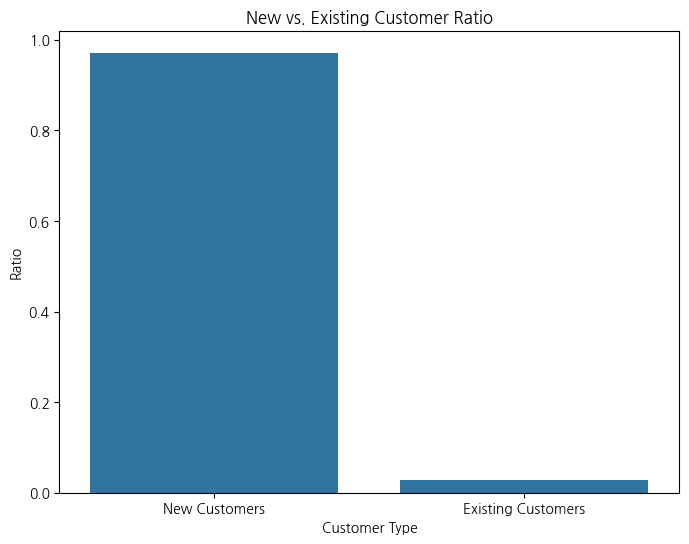

In [ ]:
# 신규 고객 비율 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x=['New Customers', 'Existing Customers'], y=[new_customer_rat, 1-new_customer_rat])
plt.title('New vs. Existing Customer Ratio')
plt.ylabel('Ratio')
plt.xlabel('Customer Type')
plt.show()


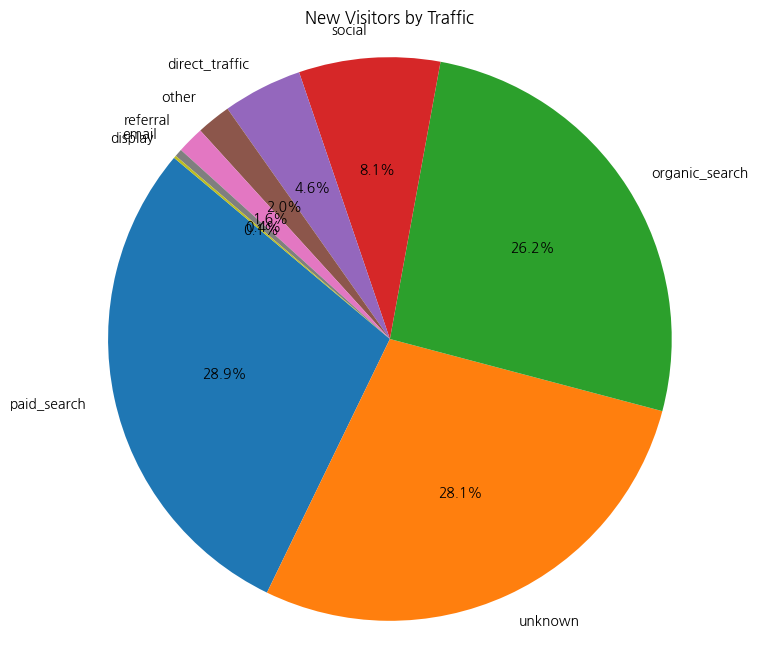

In [ ]:
# 1. 신규 방문자 수 식별
def identify_new_visitors(order):
    # 주문 데이터를 고객 고유 식별자(customer_unique_id)로 그룹화하여 최소 주문 구매 타임스탬프를 찾음
    first_purchase_timestamp = order.groupby('customer_unique_id')['order_purchase_timestamp'].min().reset_index()

    # 전체 주문 데이터와 첫 주문 데이터를 병합하여 신규 방문자 식별
    visitors = pd.merge(order, first_purchase_timestamp, on='customer_unique_id', how='left', suffixes=('', '_first'))

    # 신규 방문자는 최소 주문 구매 타임스탬프와 실제 주문 구매 타임스탬프가 동일한 경우
    new_visitors = visitors[visitors['order_purchase_timestamp'] == visitors['order_purchase_timestamp_first']]

    return new_visitors['customer_unique_id'].nunique()

# 2. 주문 아이템의 origin 데이터 가져오기
order_item_origin = ord_ite['origin']

# 3. 데이터 병합하여 각 트래픽별로 신규 방문자 수 계산
traffic_new_visitors = order_item_origin.groupby(order_item_origin).apply(lambda x: identify_new_visitors(order.loc[x.index])).sort_values(ascending=False)

# 파이차트로 시각화
plt.figure(figsize=(8, 8))
plt.pie(traffic_new_visitors, labels=traffic_new_visitors.index, autopct='%1.1f%%', startangle=140)
plt.title('New Visitors by Traffic')
plt.axis('equal')
plt.show()

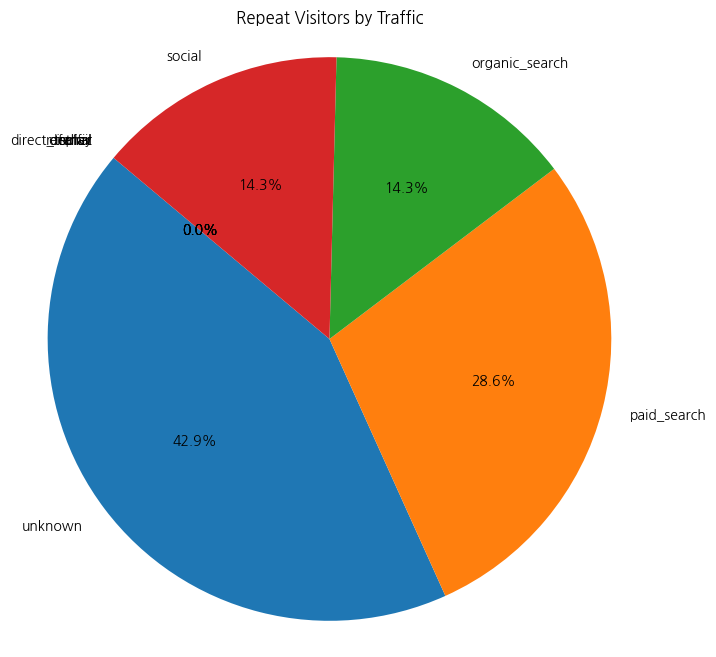

In [ ]:
# 1. 반복 방문자 수 식별
def identify_repeat_visitors(order):
    # 주문 데이터를 고객 고유 식별자(customer_unique_id)로 그룹화하여 최소 주문 구매 타임스탬프를 찾음
    first_purchase_timestamp = order.groupby('customer_unique_id')['order_purchase_timestamp'].min().reset_index()

    # 전체 주문 데이터와 첫 주문 데이터를 병합하여 반복 방문자 식별
    visitors = pd.merge(order, first_purchase_timestamp, on='customer_unique_id', how='left', suffixes=('', '_first'))

    # 반복 방문자는 최소 주문 구매 타임스탬프와 실제 주문 구매 타임스탬프가 다른 경우
    repeat_visitors = visitors[visitors['order_purchase_timestamp'] > visitors['order_purchase_timestamp_first']]

    return repeat_visitors['customer_unique_id'].nunique()

# 2. 주문 아이템의 origin 데이터 가져오기
order_item_origin = ord_ite['origin']

# 3. 데이터 병합하여 각 트래픽별로 반복 방문자 수 계산
traffic_repeat_visitors = order_item_origin.groupby(order_item_origin).apply(lambda x: identify_repeat_visitors(order.loc[x.index])).sort_values(ascending=False)


# 파이차트로 시각화
plt.figure(figsize=(8, 8))
plt.pie(traffic_repeat_visitors, labels=traffic_repeat_visitors.index, autopct='%1.1f%%', startangle=140)
plt.title('Repeat Visitors by Traffic')
plt.axis('equal')
plt.show()

# 지역별 주문 비율 계산

In [ ]:
# 지역별 주문 비율 계산
order_distribution_by_region = order['customer_state'].value_counts(normalize=True)
print("지역별 주문 비율:")
print(order_distribution_by_region)



지역별 주문 비율:
customer_state
SP    0.422033
RJ    0.129701
MG    0.116061
RS    0.055477
PR    0.050881
SC    0.036428
BA    0.034117
DF    0.021196
GO    0.020417
ES    0.019906
PE    0.016020
CE    0.013216
MT    0.009572
PA    0.009356
MS    0.007313
MA    0.007201
PB    0.005357
PI    0.004855
RN    0.004847
AL    0.003938
SE    0.003401
TO    0.002882
RO    0.002415
AM    0.001454
AC    0.000805
AP    0.000718
RR    0.000433
Name: proportion, dtype: float64


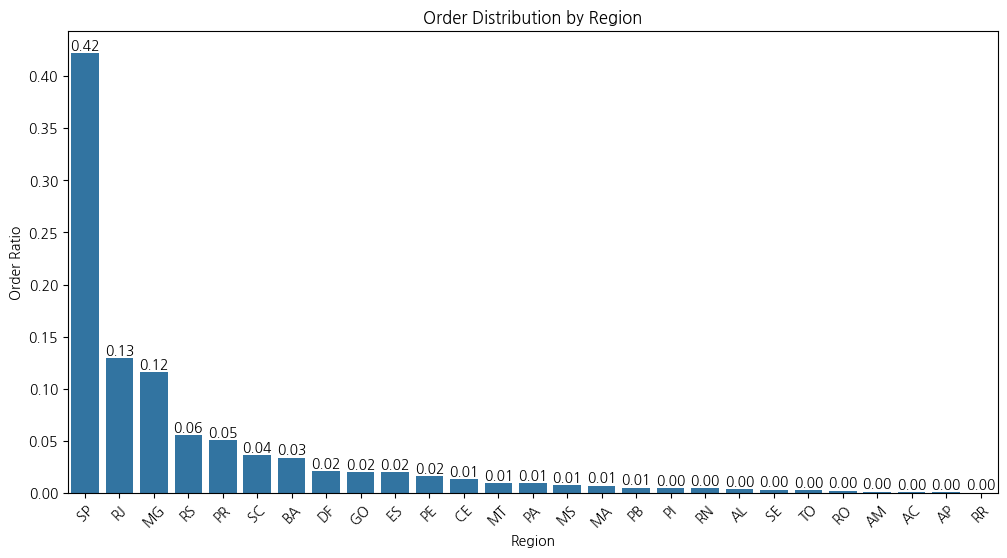

In [ ]:
# 지역별 주문 비율 시각화

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=order_distribution_by_region.index, y=order_distribution_by_region.values)

# 각 바차트 위에 수치 추가
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Order Distribution by Region')
plt.ylabel('Order Ratio')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.show()

In [ ]:
import folium


# 브라질의 주요 도시 축약값과 해당 도시의 위경도 좌표값
city_coordinates = {
    'SP': (-23.5505, -46.6333),  # 상파울루
    'PR': (-25.4284, -49.2733),  # 파라나
    'RJ': (-22.9068, -43.1729),  # 리우데자네이루
    'MG': (-19.9167, -43.9333),  # 미나스제랄리스
    'GO': (-16.6799, -49.255),   # 고이아니아
    'BA': (-12.9714, -38.5014),  # 바이아
    'ES': (-20.3155, -40.3128),  # 에스피리투산뚜
    'MT': (-15.601, -56.0974),   # 마토그로소
    'RS': (-30.033, -51.23),     # 리우그란지도스울
    'DF': (-15.7939, -47.8828),  # 브라질리아
    'SC': (-27.5954, -48.548),   # 산타카타리나
    'PA': (-1.4558, -48.4902),   # 파라
    'PE': (-8.0476, -34.877),    # 페른바쿠코
    'TO': (-10.1675, -48.3317),  # 투카지도노르트
    'MA': (-2.5391, -44.2823),   # 마라냐운
    'CE': (-3.7172, -38.5431),   # 포르탈레자
    'RN': (-5.7945, -35.211),    # 리우그란지도놀트
    'SE': (-10.9472, -37.0731),  # 샤르아
    'MS': (-20.4428, -54.6467),  # 마토그로소두두스
    'PB': (-7.115, -34.8631),    # 포르탈레자
    'AL': (-9.667, -35.733),     # 알라고아스
    'PI': (-5.092, -42.8034),    # 피아우이
    'AM': (-3.1019, -60.025),    # 아마조나스
    'AP': (0.0349, -51.0664),    # 아마파
    'AC': (-9.974, -67.81),      # 아크레
    'RO': (-11.5057, -63.5806),  # 렌조노르트
    'RR': (2.8198, -60.6753)     # 로란타마
}


# 초기 지도 중심 설정
map_center = [-14.2350, -51.9253]
m = folium.Map(location=map_center, zoom_start=4)

# 지역별 주문 비율을 이용하여 폴리움으로 시각화
for region, ratio in order_distribution_by_region.items():
    coord = city_coordinates.get(region)
    if coord:
        # 주문 비율에 따라 원의 크기 조절
        radius = ratio * 650000
        # 주문 비율에 따라 원의 색상 조절
        color = 'red' if ratio > 0.05 else 'blue' if ratio > 0.03 else 'green'
        folium.Circle(location=coord, radius=radius, color=color, fill=True, fill_color=color, fill_opacity=0.5,
                      popup=f"Region: {region}<br>Order Ratio: {ratio:.2f}").add_to(m)

# 생성된 지도를 웹 브라우저에 표시
m

# 상품 카테고리별 주문 건수 계산

In [ ]:
# 상품 카테고리별 주문 건수 계산
order_count_by_product_category = order.groupby('product_category_name_english')['order_id'].count()
print("상품 카테고리별 주문 건수:")
print(order_count_by_product_category)


상품 카테고리별 주문 건수:
product_category_name_english
agro_industry_and_commerce     252
air_conditioning               297
art                            217
arts_and_craftmanship           24
audio                          377
                              ... 
stationery                    2607
tablets_printing_image          85
telephony                     4692
toys                          4243
watches_gifts                 6158
Name: order_id, Length: 71, dtype: int64


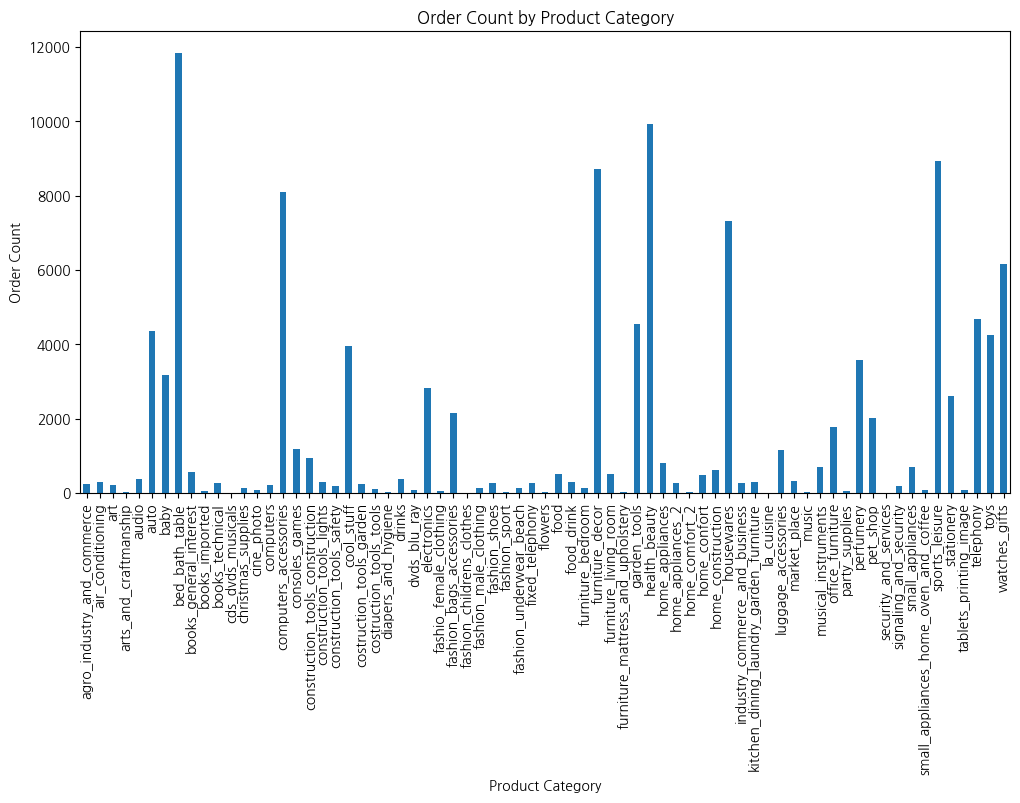

In [ ]:
# 상품 카테고리별 주문 건수 시각화
plt.figure(figsize=(12, 6))
order_count_by_product_category.plot(kind='bar', legend=None)
plt.title('Order Count by Product Category')
plt.ylabel('Order Count')
plt.xlabel('Product Category')
plt.xticks(rotation=90)
plt.show()

In [ ]:

# # 상위 15개 상품 카테고리만 추출
# top15_product_categories = order_count_by_product_category_df.sort_values(by='Order Count', ascending=False).head(15)

# # 상품 카테고리별 주문 건수 시각화 (상위 15개 상품 카테고리)
# plt.figure(figsize=(12, 6))
# bar_plot = sns.barplot(x='Product Category', y='Order Count', data=top15_product_categories)
# plt.title('Top 15 Product Categories by Order Count')
# plt.ylabel('Order Count')
# plt.xlabel('Product Category')
# plt.xticks(rotation=90)